In [ ]:
pip install yfinance

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import math


In [ ]:
#Import the data
dataset = yf.download('BTC-USD')


[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,28720.271484,31285268319
2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707
2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605


Text(0.5, 1.0, 'Whole period of timeframe of Bitcoin close price 2014-2022')

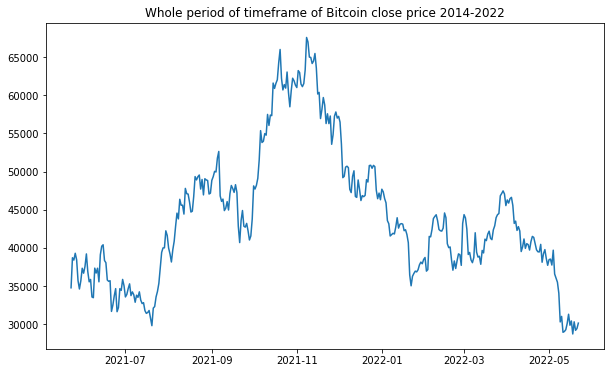

In [ ]:
#Whole period of timeframe of Bitcoin close price 2014-2022
plt.figure(figsize=(10,6))
plt.plot(dataset.index, dataset['Close'])
plt.title('Whole period of timeframe of Bitcoin close price 2014-2022')

In [ ]:
#SELECT THE RANGE FOR THE MODEL TO TRAIN ON
dataset = dataset[dataset.index > '2021-05-22']
close_stock = dataset.copy()
print("Total data for prediction: ",dataset.shape[0])

Total data for prediction:  365


Text(0.5, 1.0, 'RANGE FOR THE MODEL TO TRAIN ON')

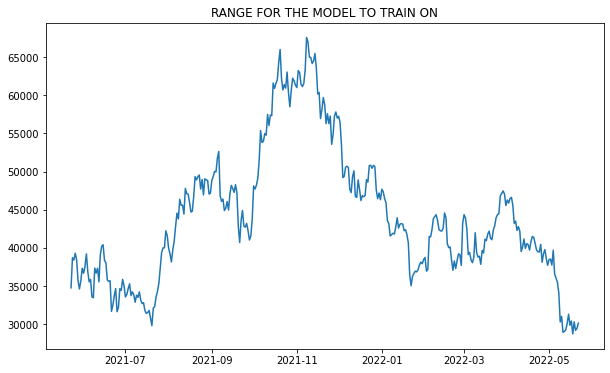

In [ ]:
#RANGE FOR THE MODEL TO TRAIN ON
plt.figure(figsize=(10,6))
plt.plot(dataset.index, dataset['Close'])
plt.title('RANGE FOR THE MODEL TO TRAIN ON')

In [ ]:
#splitting into train and test

train_size = int(len(dataset)*0.9)
train_data = list(dataset[0:train_size]['Close'])
test_data = list(dataset[train_size:]['Close'])



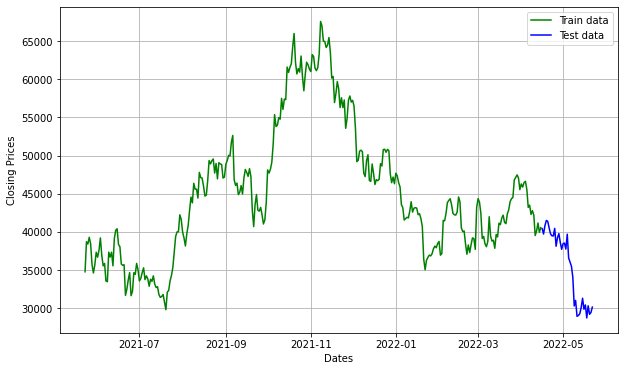

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(dataset[0:train_size]['Close'], 'green', label= 'Train data' )
plt.plot(dataset[train_size:]['Close'], 'blue', label = 'Test data')
plt.legend()

In [ ]:
#Importing ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import  mean_squared_error, mean_absolute_error

In [ ]:
model_predictions =[]
n_test_obser = len(test_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(train_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = test_data[i]
  train_data.append(actual_test_value)
  #print(output)
  


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  363
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -3184.886
Method:                       css-mle   S.D. of innovations           1563.714
Date:                Sun, 22 May 2022   AIC                           6381.772
Time:                        22:19:12   BIC                           6405.139
Sample:                             1   HQIC                          6391.060
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.1645     76.770     -0.198      0.844    -165.631     135.302
ar.L1.D.y      0.0090      0.053      0.170      0.865      -0.095       0.113
ar.L2.D.y     -0.0988      0.053     -1.868      0.0

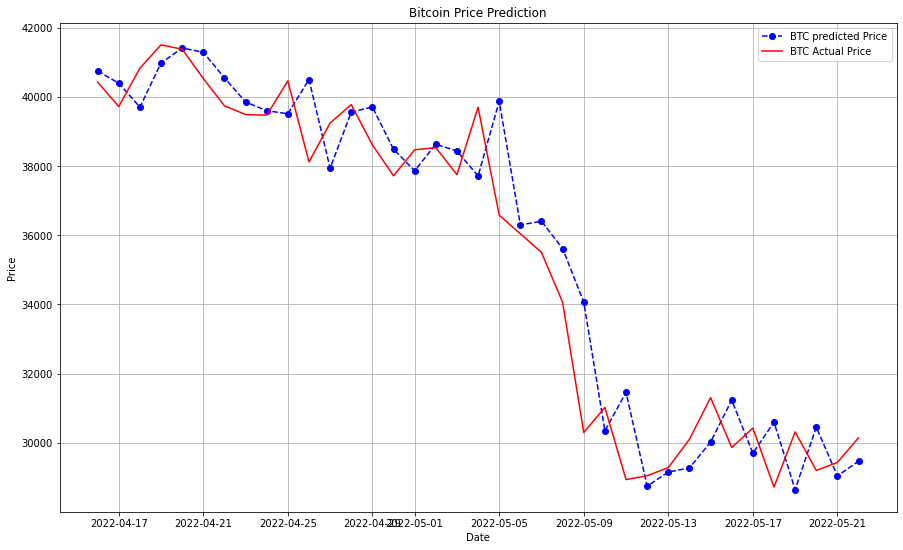

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = dataset[train_size:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, test_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#calculating Mean Absolute Percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: '+ str(mape)) # Mean Absolute Percentage Error

# Around 3% MAPE(Mean Absolute Percantage Error) implies the model is about 97 % accurate in predicting the test set observations

MAPE: 0.03056616730024436
